## Author : Braham Parkash

## Data Science & Business Analytics Internship
## GRIP - The Spark Foundation
##Task-5 Stock Market Prediction using Numerical and Textual Analysis

## Objective: Create a hybrid model for stock price/performance prediction
using numerical analysis of historical stock prices, and sentimental analysis of
news headlines
* Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
* Download historical stock prices from finance.yahoo.com
* Download textual (news) data from https://bit.ly/36fFPI6

In [26]:
print('Importing Needed Packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

Importing Needed Packages


In [27]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')

In [ ]:
!pip install pandas-datareader

In [ ]:
import datetime
import pandas_datareader.data as web


* Pandas web data reader is an extension of pandas library to communicate with most updated Financial Data

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 13)

In [ ]:
df=web.DataReader('AAPL','yahoo',start,end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.477847


In [ ]:
#Take a look at dataset

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.358185
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.538239
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.121498
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.293579
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,77.923538


* Rolling Mean (Moving Average)
to determine trend         
  * The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [ ]:
rol_close=df['Close']
mvg_avg=rol_close.rolling(100).mean()
mvg_avg


Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2020-01-07    61.288825
2020-01-08    61.542450
2020-01-09    61.800275
2020-01-10    62.050225
2020-01-13    62.316725
Name: Close, Length: 2524, dtype: float64

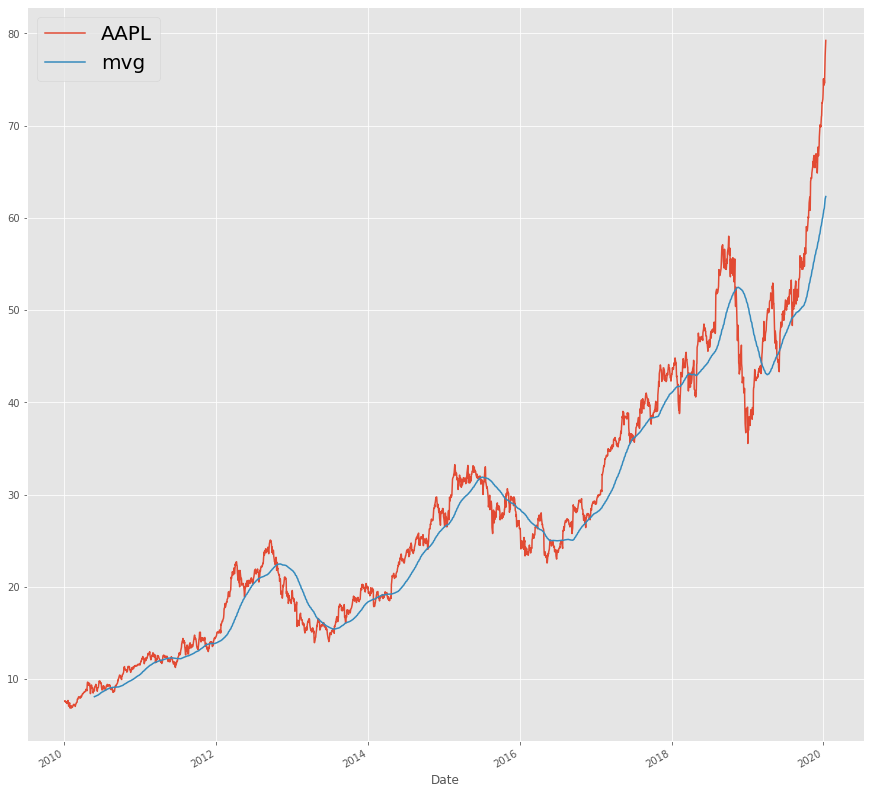

In [ ]:
rol_close.plot(label='AAPL')
mvg_avg.plot(label='mvg')
plt.legend(loc=0,fontsize=20)
plt.show()

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.


## Return Deviation
**to determine risk and return**                 

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - investopedia

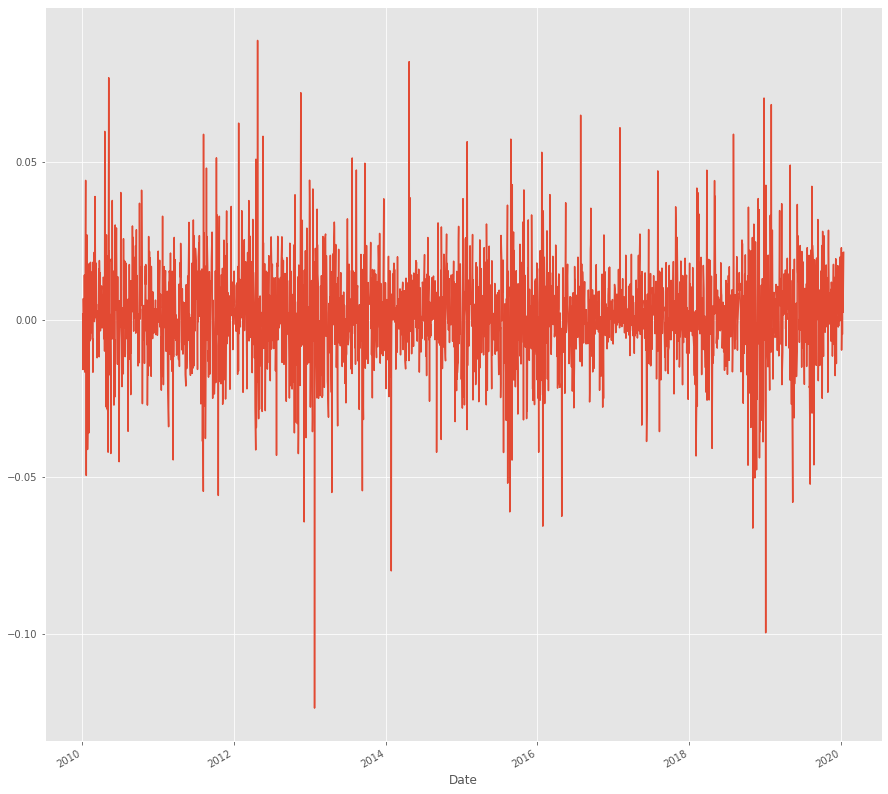

In [ ]:
returns=rol_close/rol_close.shift(1)-1
returns.plot(label='return')
plt.show()

logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.


##Analysis Competitors Stocks
In this segment , we are going to analyse on how one company performs in relative with its competitors. Let us assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [ ]:
df.comp=web.DataReader(['AAPL','GE','GOOG','IBM','MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [ ]:
df.comp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,6.539882,10.840267,312.204773,92.163887,24.168472
2010-01-05,6.551187,10.896401,310.829926,91.050545,24.176279
2010-01-06,6.446983,10.840267,302.994293,90.459076,24.027906
2010-01-07,6.435065,11.401575,295.940735,90.145927,23.778025
2010-01-08,6.477847,11.647147,299.885956,91.050545,23.942017
2010-01-11,6.420702,11.759411,299.432648,90.097221,23.637472
2010-01-12,6.347667,11.766427,294.137512,90.813965,23.481291
2010-01-13,6.437204,11.808523,292.448822,90.619125,23.699940
2010-01-14,6.399921,11.717312,293.823669,92.066490,24.176279


##Correlation Analysis
#Does one competitor affect others?
We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks returns


In [ ]:
perc_change=df.comp.pct_change()
change_corr=perc_change.corr()
change_corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.318618,0.464934,0.384504,0.458352
GE,0.318618,1.000000,0.331045,0.433933,0.357665
GOOG,0.464934,0.331045,1.000000,0.406538,0.541099
IBM,0.384504,0.433933,0.406538,1.000000,0.490651
MSFT,0.458352,0.357665,0.541099,0.490651,1.000000


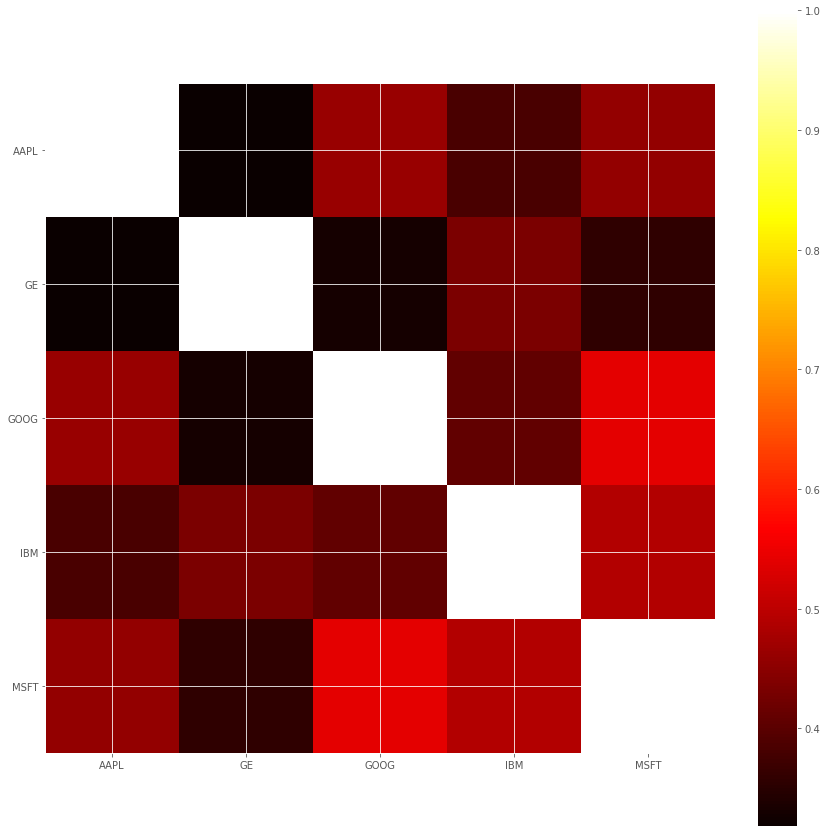

In [ ]:
plt.imshow(change_corr,cmap='hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(change_corr)),change_corr.columns)
plt.yticks(range(len(change_corr)),change_corr.columns)
plt.show()


From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

## Stocks Return Rate and Risk
Apart from correlation, we also analyse each stock's risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk)

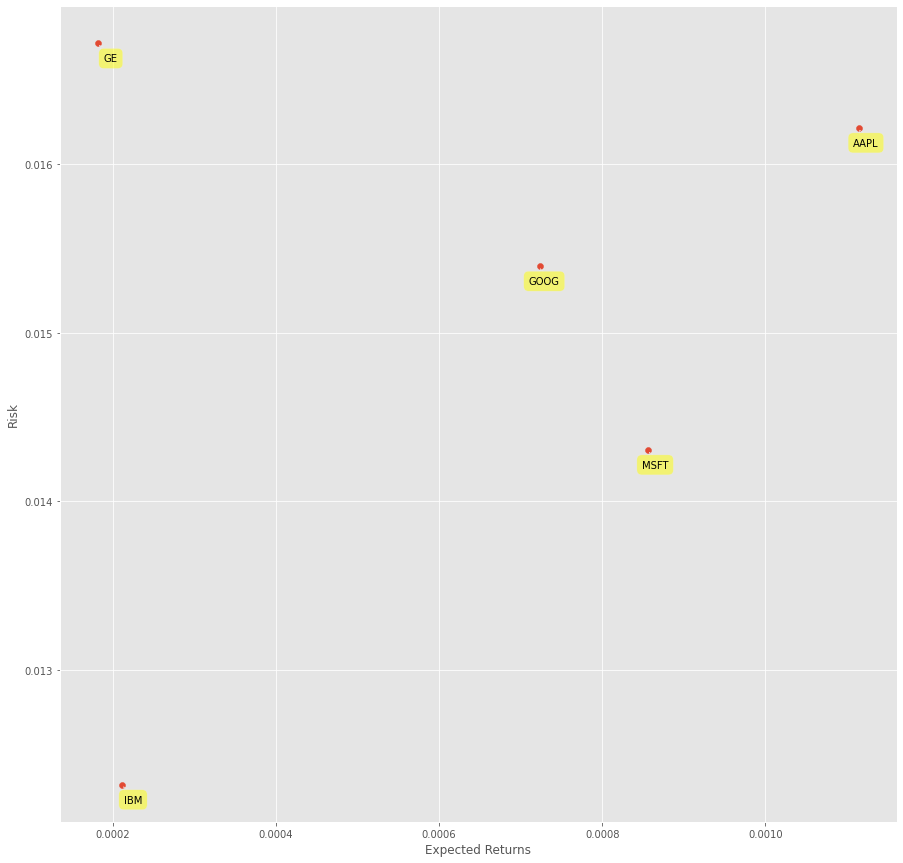

In [ ]:
plt.scatter(perc_change.mean(),perc_change.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(perc_change.columns, perc_change.mean(), perc_change.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

##India-News-Headlines file imported and doing Numerical Analysis

In [19]:
import pandas as pd
news_df = pd.read_csv("india-news-headlines.csv",engine='python',error_bad_lines=False)                

Skipping line 345965: unexpected end of data


In [20]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [21]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345963 entries, 0 to 345962
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   publish_date       345963 non-null  int64 
 1   headline_category  345963 non-null  object
 2   headline_text      345963 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.9+ MB


In [ ]:
news_df.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [ ]:
news_df.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
news_df.duplicated().sum()

21585

In [ ]:
print('there are {} duplicated rows out of {} total rows in our dataset'.format(news_df.duplicated().sum(),df1.shape[0]))

there are 21585 duplicated rows out of 3297172 total rows in our dataset


In [22]:
print('remove duplicates')
news_df.drop_duplicates(inplace=True)

remove duplicates


In [23]:
news_df.duplicated().sum()

0

In [ ]:
news_df.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [ ]:
news_df.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [ ]:
news_df.headline_category.unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [ ]:
news_df.headline_text.unique()

array(['win over cena satisfying but defeating undertaker bigger roman reigns',
       'Status quo will not be disturbed at Ayodhya; says Vajpayee',
       'Fissures in Hurriyat over Pak visit', ...,
       'kangana ranaut gets a doll version of herself her team shares manikarnika dolls are the new favourite for children',
       'meezaan jaffrey reminisces his childhood days with his grandfather jagdeep with an adorable throwback picture',
       'prabhas20 titled as radhe shyam prabhas and pooja hegde strike a romantic pose in the first look'],
      dtype=object)

In [ ]:
news_df.corr()

,publish_date
publish_date,1.0


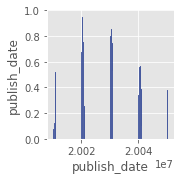

In [30]:
sns.set_palette('dark')
sns.pairplot(news_df)
plt.show()

In [31]:
news_df.headline_category.value_counts()

unknown                              47817
india                                46588
city.bengaluru                       20410
city.hyderabad                       19392
business.india-business              18888
                                     ...  
tech.computing                           1
life-style.health-fitness.health         1
life-style.health-fitness.fitness        1
gurcharan-das.men-ideas                  1
tech.it-services                         1
Name: headline_category, Length: 144, dtype: int64

In [ ]:
news_df.headline_text.value_counts()

Sunny Leone HOT photos                                98
Football: Italian Serie A table                       87
Football: Spanish La Liga table                       84
Intraday targets/key levels                           81
Football: French Ligue 1 table                        73
                                                      ..
No promotion: Teachers stage agitation                 1
Overbridges will not spill over pvt land               1
Neighbour rapes 3-year-old girl in Khandwa; booked     1
Marathi actor Nevrekar no more                         1
How does HIV virus evade immune system                 1
Name: headline_text, Length: 3082589, dtype: int64

In [ ]:
news_df.headline_text.value_counts().nlargest(20)

Sunny Leone HOT photos                       98
Football: Italian Serie A table              87
Football: Spanish La Liga table              84
Intraday targets/key levels                  81
Football: French Ligue 1 table               73
RBI-MONEY-MARKET-OPERATION                   71
Column: Tongue in Check                      68
Your Say                                     64
Watch top news in one-minute                 63
Watch: Top news in one-minute                63
Official Site                                59
RBI-MONEY MARKET OPERATION                   59
Football: South African Premiership table    56
Who039s up                                   56
Football: English Premier League table       55
Football: German Bundesliga table            55
Jest in Case                                 53
U.S. cash crude deals                        52
Woman commits suicide                        51
Who039s down                                 49
Name: headline_text, dtype: int64

## Exploratory Data Analysis using NLP and NLTK tools

In [33]:
news_df['headline_text_len']=news_df.headline_text.str.len()

In [34]:
news_df['headline_category_len']=news_df.headline_category.str.len()

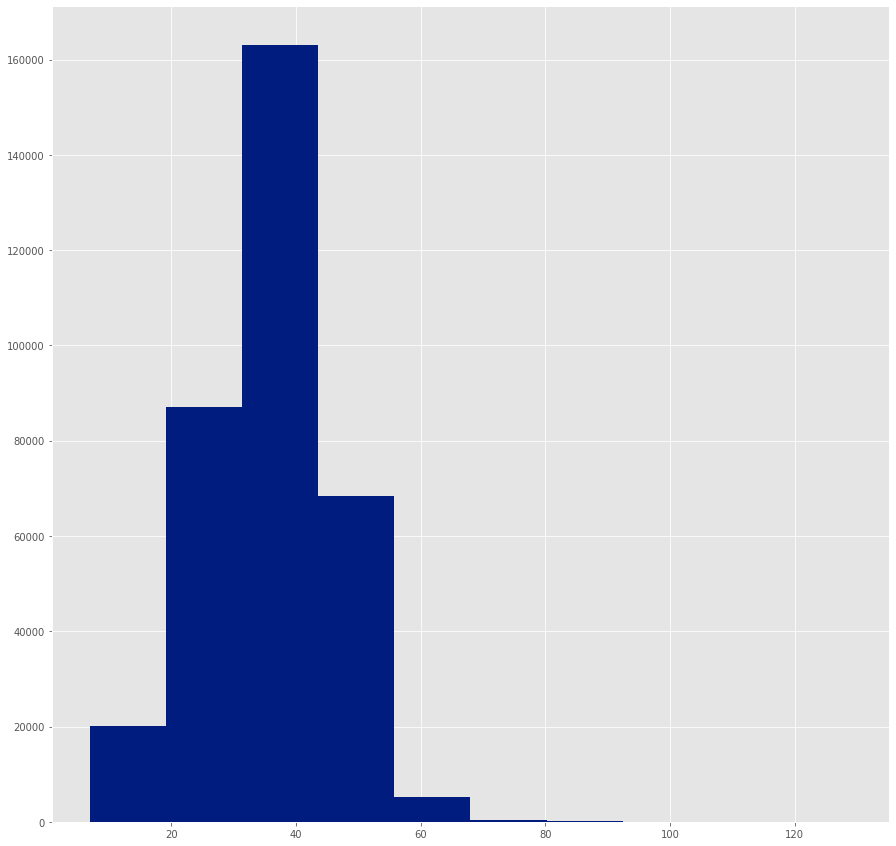

In [35]:
news_df['headline_text_len'].hist()
plt.show()

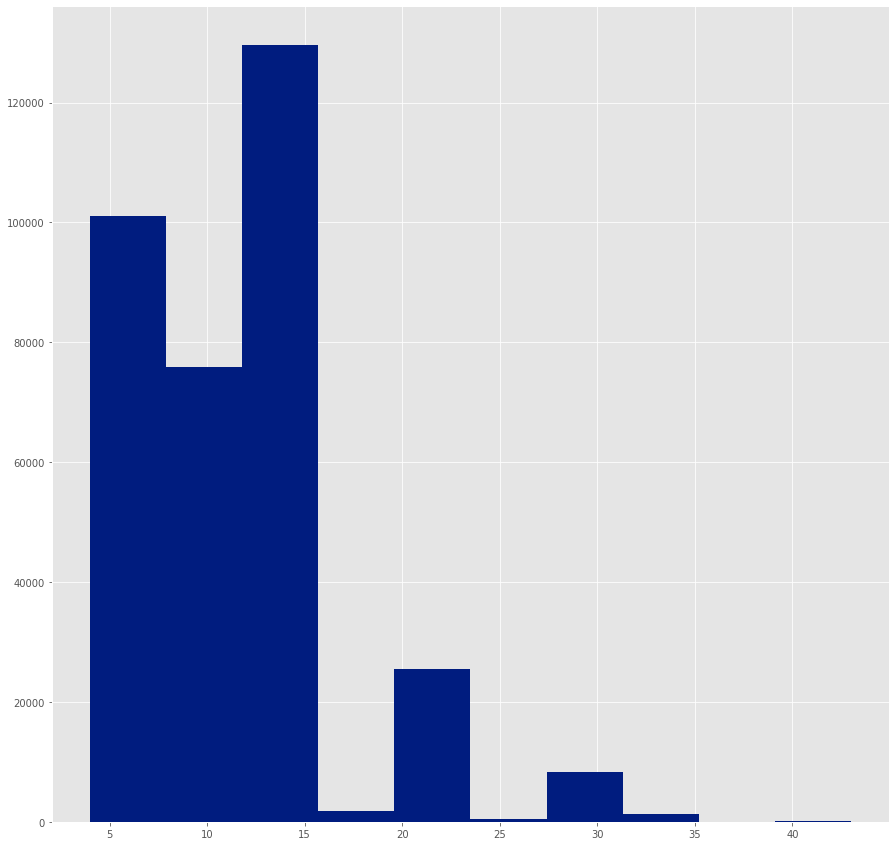

In [36]:
news_df['headline_category_len'].hist()
plt.show()

In [37]:
news_df['headline_text_wordlen']=news_df.headline_text.str.split(' ').str.len().map(lambda x : np.mean(x))


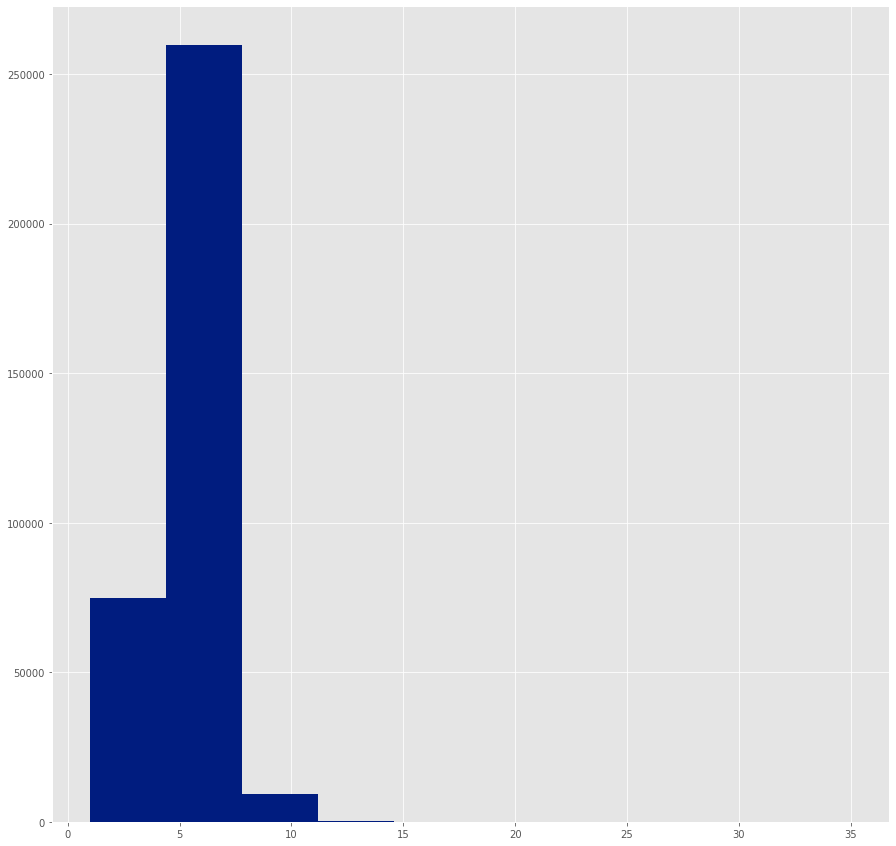

In [38]:
news_df['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
corpus = []
full_text = news_df['headline_text'].str.split()
full_text = full_text.values.tolist()
corpus = [word for i in full_text for word in i]

In [43]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

Now we know which stopwords occur frquently in our text, let's inspect which words other than these stopwords occur frequently. We will use the counter function from the collection library to count and store the occurrences of each word in a list of tupples.

In [46]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

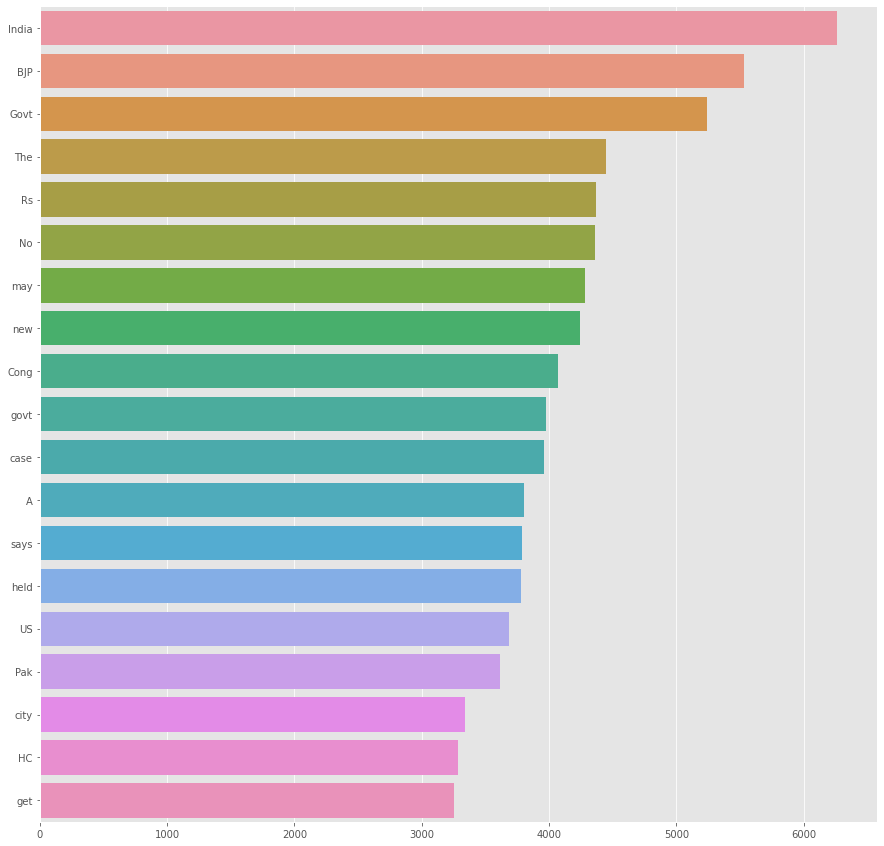

In [47]:
sns.barplot(x = y , y = x)
plt.show()

Words like India,Bjp, Govt have been dominating the headlines since last 15 years

##Ngram Exploration
Ngram are simply contiguous sequences of n words. For example "riverbank", "The three muskedteers" etc. If the number of words is 2, It is called bigram. For 3 words it is called a trigram and so on.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
def top_ngram_from_data(corpus, k = None):
    count_vec = CountVectorizer(ngram_range = (k , k)).fit(corpus)
    bag_of_words = count_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in count_vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:10]

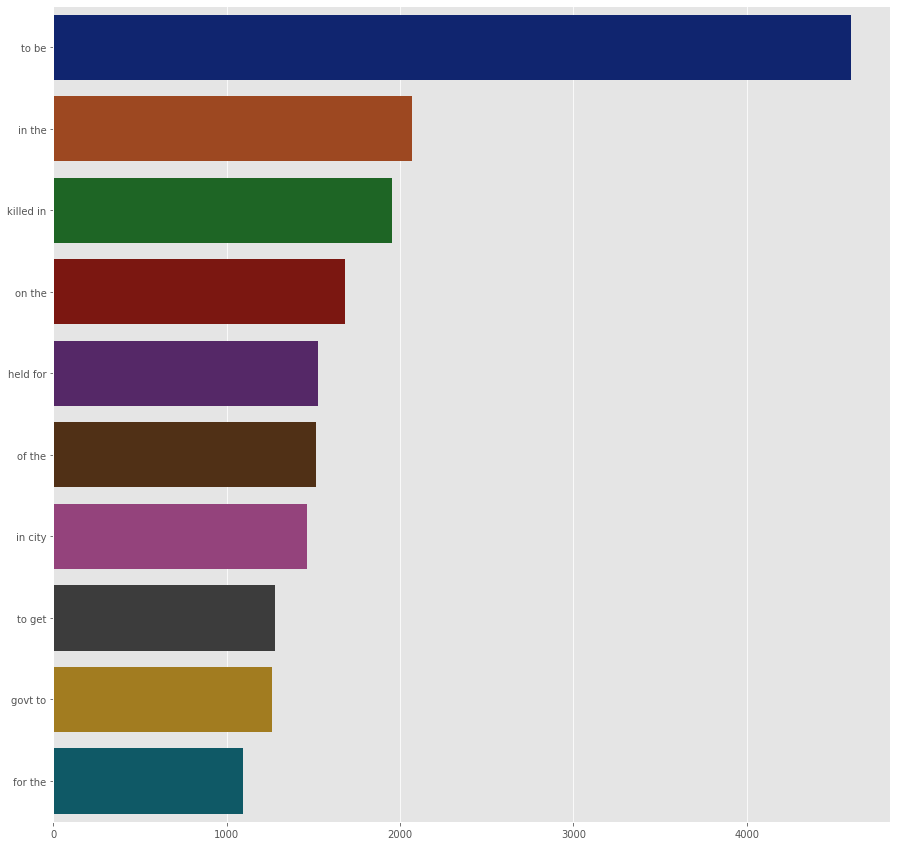

In [51]:
k_top_bigrams = top_ngram_from_data(news_df['headline_text'], 2)[:10]
x,y = map(list, zip(*k_top_bigrams))
sns.barplot(x = y, y = x)
plt.show()

## Textblob Sentiment Score

In [44]:
!pip install Textblob

In [52]:
from textblob import TextBlob


In [53]:
TextBlob('raj is killing people').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [73]:
def polarity_cal(text):
  pol=TextBlob(text).sentiment.polarity
  return pol
news_df['Polarity_score']=news_df['headline_text'].apply(lambda x:polarity_cal(x))


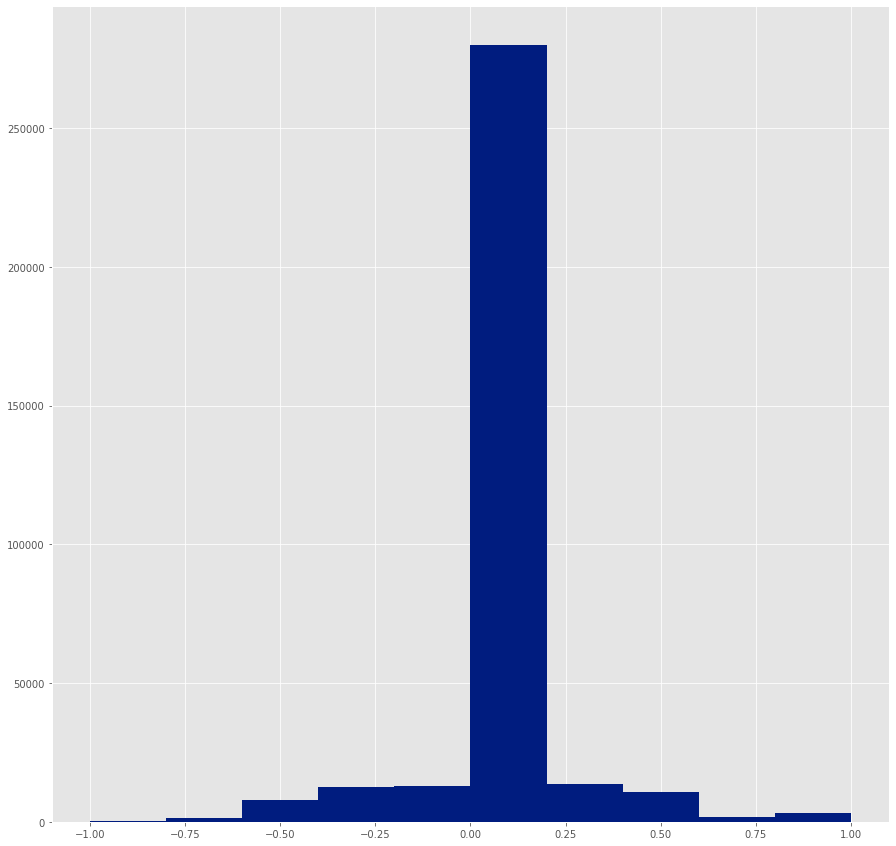

In [74]:
news_df['Polarity_score'].hist()
plt.show()

In [79]:
def sentiment_cal(x):
  
  if x==0:
    return 'neutral'

  elif x<0:
    return 'negative'

  else:
    return 'positive'     

In [80]:
news_df['Polarity']=news_df['Polarity_score'].apply(lambda x: sentiment_cal(x))

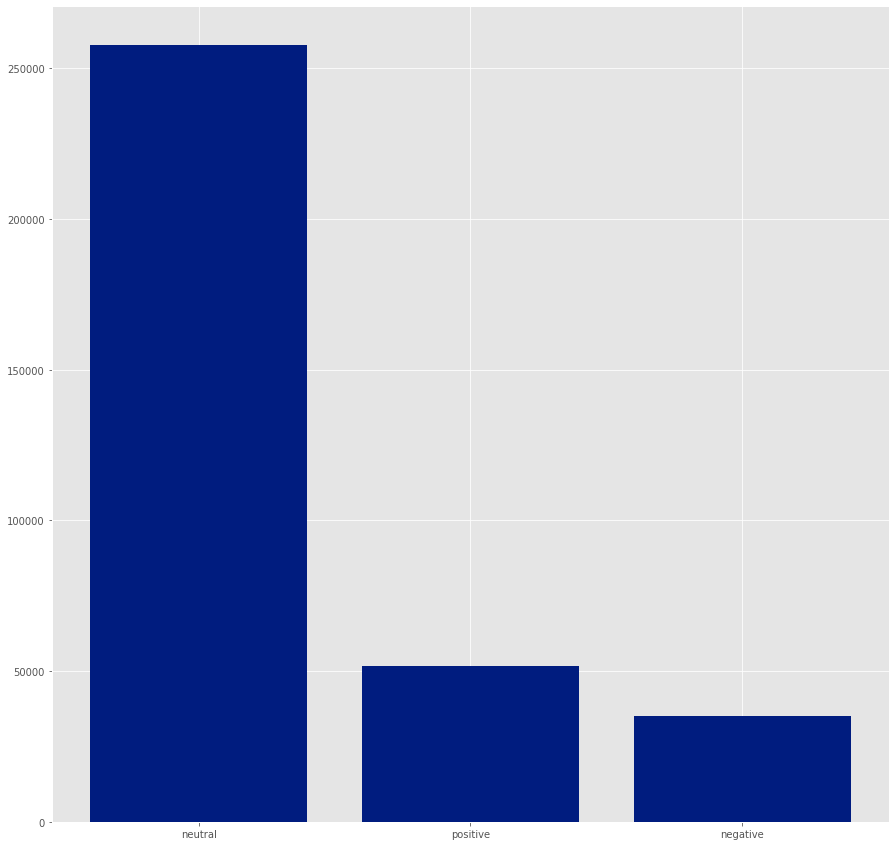

In [89]:
plt.bar(news_df['Polarity'].value_counts().index,news_df['Polarity'].value_counts())
plt.show()

In [84]:
news_df[news_df['Polarity'] == 'positive']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
53                Come to Nandi Hills...and you can fly
54               HAL approached for super jumbo project
Name: headline_text, dtype: object

In [86]:
news_df[news_df['Polarity'] == 'negative']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object